# Question 1



In [46]:
import pandas as pd
import numpy as np
from keras.datasets import mnist
import requests
from io import BytesIO
import matplotlib.pyplot as plt

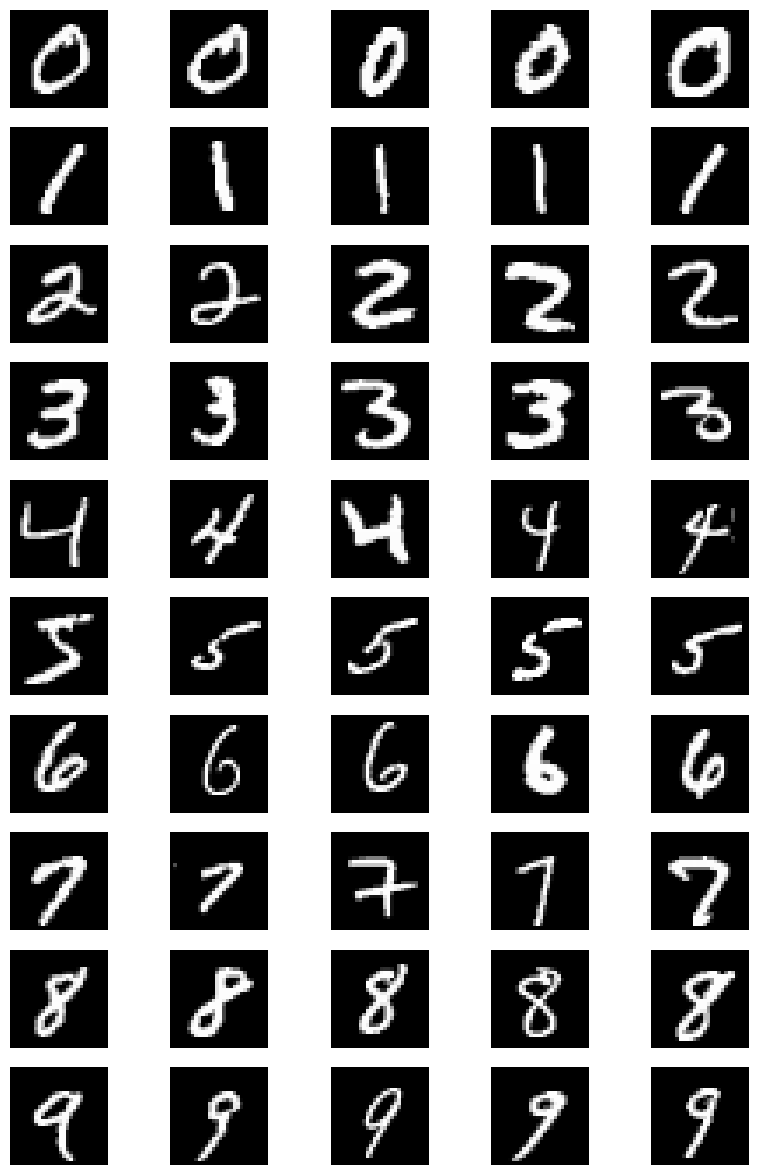

In [47]:
url = 'https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz'
response = requests.get(url)
data = np.load(BytesIO(response.content))

x_train = data['x_train']
y_train = data['y_train']
x_test = data['x_test']
y_test = data['y_test']

samples = []

for i in range(10):
  samples.append([])

for i in range(len(x_train)):
  num = y_train[i]
  if len(samples[num]) < 5:
    samples[num].append(x_train[i])

fig, axes = plt.subplots(10, 5, figsize=(10, 15))

for i in range(10):
  for j in range(5):
    axes[i, j].imshow(samples[i][j], cmap='gray')
    axes[i, j].axis('off')

In [48]:
x_train = x_train.reshape((60000, 784))
x_test = x_test.reshape((10000, 784))
print("Shape of Train matrix: ", x_train.shape)
print("Shape of Test matrix: ", x_test.shape)

Shape of Train matrix:  (60000, 784)
Shape of Test matrix:  (10000, 784)


In [49]:
class_prior = []
for i in range(10):
  s = np.sum(y_train == i)
  class_prior.append(s/len(y_train))
print("Priors of every class")
print(class_prior)

Priors of every class
[0.09871666666666666, 0.11236666666666667, 0.0993, 0.10218333333333333, 0.09736666666666667, 0.09035, 0.09863333333333334, 0.10441666666666667, 0.09751666666666667, 0.09915]


In [50]:
mean_stats = []
cov_stats = []
cov_det = []
cov_inv = []

for i in range(10):
  data_class = x_train[y_train == i]
  data_class_mean = data_class.mean(axis=0)
  data_class_cov = np.cov(data_class, rowvar = False) + np.identity(784)*(0.001)
  mean_stats.append(data_class_mean)
  cov_stats.append(data_class_cov)
  cov_det.append(np.linalg.slogdet(cov_stats[i])[1])
  cov_inv.append(np.linalg.inv(cov_stats[i]))

In [51]:
def qda_class(x):
  l = []
  for i in range(10):
    a = -0.5*np.dot(np.dot((x - mean_stats[i]).T, cov_inv[i]), (x - mean_stats[i]))
    b = - 0.5*(np.log(cov_det[i]))
    c =  np.log(class_prior[i])
    l.append(a+b+c)
  return l

In [52]:
prediction = []
for x in x_test:
  prediction.append(np.argmax(qda_class(x)))
print("Predictions made by qda")
print(prediction)

Predictions made by qda
[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 3, 9, 7, 2, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 2, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 8, 7, 2, 9, 2, 7, 4, 6, 4, 3, 0, 7, 0, 2, 7, 1, 7, 3, 2, 9, 7, 9, 6, 2, 7, 8, 4, 7, 2, 6, 8, 3, 6, 4, 3, 8, 4, 4, 2, 6, 9, 6, 0, 5, 4, 9, 9, 2, 8, 9, 4, 8, 8, 3, 9, 7, 4, 4, 4, 9, 8, 3, 8, 7, 6, 7, 4, 0, 5, 8, 5, 6, 6, 3, 3, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 2, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 8, 2, 3, 2, 9, 1, 8, 1, 8, 1, 8, 8, 0, 8, 4, 2, 5, 0, 1, 8, 2, 0, 9, 0, 4, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 8, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 8, 8, 8, 7, 2, 3, 0, 2, 4, 2, 4, 8, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 4, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 8, 5, 9, 2, 6, 4, 8, 8, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 5, 5, 2, 5, 8, 8, 9, 3, 5, 

Accuracy

In [53]:
res = []
for i in range(11):
  res.append([0, 0])

samples_len = len(y_test)

for i in range(samples_len):
  sample_class = y_test[i]
  res[sample_class][0]+=1
  if (prediction[i] == sample_class):
    res[sample_class][1]+=1
    res[10][1]+=1

print("Accuracy for each class and overall upto 2 decimal points")
for ind in range(len(res)-1):
  print(f"Class {ind} Accuracy: ", "{:.2f}".format((res[ind][1]/res[ind][0])*100), "%")
print("Overall Accuracy: ", "{:.2f}".format((res[10][1]/samples_len)*100), "%")


Accuracy for each class and overall upto 2 decimal points
Class 0 Accuracy:  93.37 %
Class 1 Accuracy:  67.49 %
Class 2 Accuracy:  93.51 %
Class 3 Accuracy:  87.82 %
Class 4 Accuracy:  90.84 %
Class 5 Accuracy:  79.93 %
Class 6 Accuracy:  89.04 %
Class 7 Accuracy:  86.19 %
Class 8 Accuracy:  88.71 %
Class 9 Accuracy:  82.46 %
Overall Accuracy:  85.73 %


# Question 2

In [54]:
X = np.concatenate([x_train[y_train == i][:100] for i in range(10)], axis=0).T
X_mean = np.mean(X, axis=0)
X_centre = X - X_mean
print("Shape of X: ", X.shape)
print("X_centre: ", X_centre)

Shape of X:  (784, 1000)
X_centre:  [[-39.6619898  -45.19515306 -46.56505102 ... -31.58418367 -38.73214286
  -26.43367347]
 [-39.6619898  -45.19515306 -46.56505102 ... -31.58418367 -38.73214286
  -26.43367347]
 [-39.6619898  -45.19515306 -46.56505102 ... -31.58418367 -38.73214286
  -26.43367347]
 ...
 [-39.6619898  -45.19515306 -46.56505102 ... -31.58418367 -38.73214286
  -26.43367347]
 [-39.6619898  -45.19515306 -46.56505102 ... -31.58418367 -38.73214286
  -26.43367347]
 [-39.6619898  -45.19515306 -46.56505102 ... -31.58418367 -38.73214286
  -26.43367347]]


In [55]:
S = np.dot(X_centre, X_centre.T) / 999

eigenvalues, eigenvectors = np.linalg.eigh(S)

idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
U = eigenvectors[:, idx]

Y = np.dot(U.T, X_centre)
X_re = np.dot(U, Y) + X_mean

mse = np.mean((X - X_re)**2)
print(f"MSE between Xreconstrcuted and X: {mse}")
print("Shape: X_re: ", X_re.shape)
print(X_re)

MSE between Xreconstrcuted and X: 1.8428985138726748e-26
Shape: X_re:  (784, 1000)
[[-1.42108547e-14  1.42108547e-14  7.10542736e-15 ... -2.13162821e-14
  -6.39488462e-14  0.00000000e+00]
 [-4.97379915e-14 -3.55271368e-14 -2.91322522e-13 ... -1.84741111e-13
  -2.70006240e-13 -1.45661261e-13]
 [ 5.04485342e-13  2.62900812e-13 -1.84741111e-13 ...  5.61328761e-13
   7.10542736e-14 -1.27897692e-13]
 ...
 [ 2.13162821e-14  2.84217094e-14  2.13162821e-14 ... -2.84217094e-14
   0.00000000e+00 -1.77635684e-14]
 [ 9.94759830e-14  1.06581410e-13  4.26325641e-14 ... -3.55271368e-15
  -4.97379915e-14 -2.48689958e-14]
 [ 1.42108547e-14  2.84217094e-14  1.27897692e-13 ... -1.77635684e-14
  -6.39488462e-14  0.00000000e+00]]


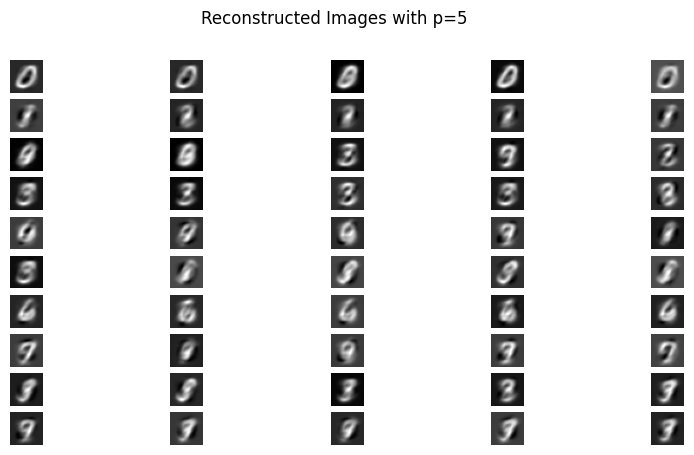

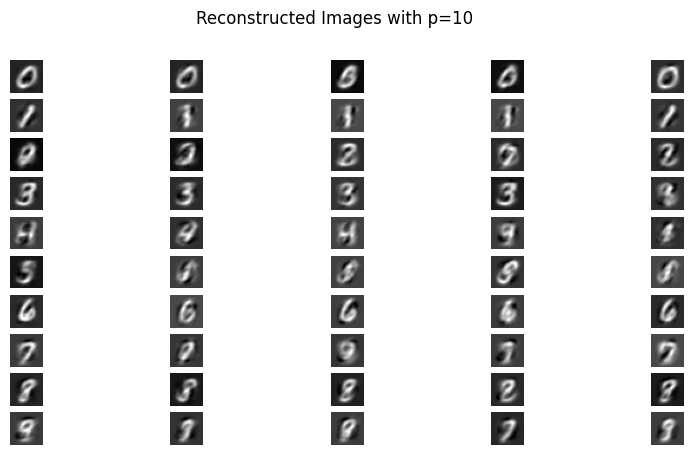

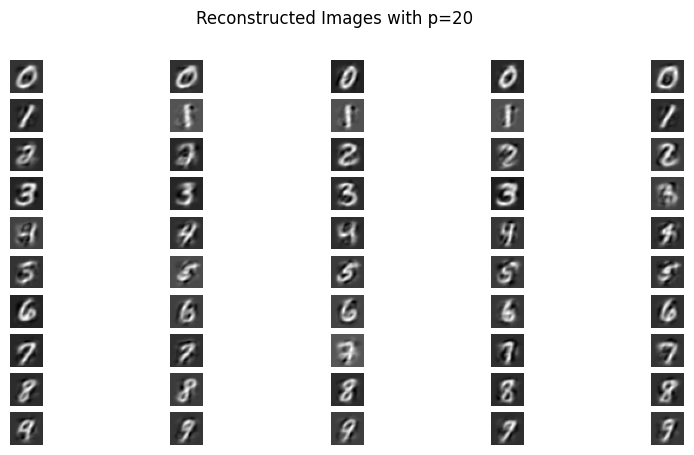

In [56]:
for p in [5, 10, 20]:
    Up = U[:, :p]
    Yp = np.dot(Up.T, X_centre)
    Xre_p = np.dot(Up, Yp) + X_mean
    plt.figure(figsize=(10, 5))
    for i in range(10):
        for j in range(5):
            plt.subplot(10, 5, i*5 + j + 1)
            plt.imshow(Xre_p[:, 100 * i + j].reshape(28, 28), cmap='gray')
            plt.axis("off")
    plt.suptitle(f"Reconstructed Images with p={p}")
    plt.show()